In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import os.path

In [3]:
if not os.path.isfile('lab_helper.py'):
    ! wget https://github.com/lab-ml-itba/Laboratorio-01/raw/master/lab_helper.py

In [4]:
from lab_helper import plot_boundaries, get_polynimial_set, plot_gaussians

C:\Users\USUARIO\anaconda3\envs\IDSA37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
def generate_elipse_data(N=500, random_state=42):
    np.random.seed(random_state)
    X = 2*(np.random.rand(N, 2)-0.5)
    y = 1*(2*(X[:,0]**2 + 2*X[:,1]**2 - 2*X[:,1]*X[:,0])<0.8)
    return X, y

def generate_gaussians_distributions(N=500, random_state=42):
    np.random.seed(random_state)
    X1 = np.random.multivariate_normal([0.5, 0.5], [[0.1,-0.085],[-0.085,0.1]], N//2)
    X2 = np.random.multivariate_normal([-0.25, -0.25], [[0.1,0],[0,0.1]], N//2)
    X = np.append(X1, X2, axis=0)
    y = np.append(np.zeros(N//2), np.ones(N//2))
    return X, y

# Problema 2
#### Utilizar el dataset generate_elipse_data() y entrenar la regresión logística.
#### ¿Cuanto da el accuracy?

In [6]:
X, y = generate_elipse_data()

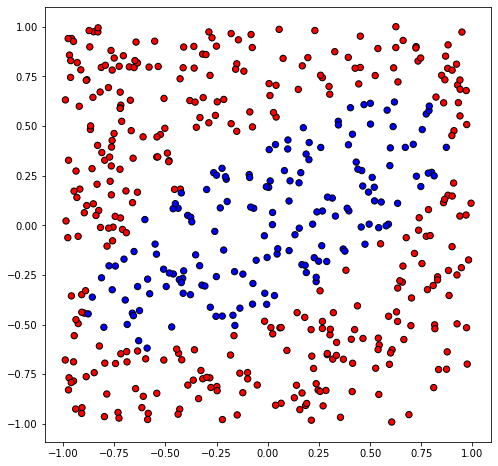

In [7]:
plt.figure(figsize=(8,8))
plot_boundaries(X,y)

In [8]:
model = LogisticRegression(solver='lbfgs')

In [9]:
model.fit(X, y)

LogisticRegression()

C:\Users\USUARIO\Documents\Python Scripts\ITBA\ML\Laboratorio1\Regresion_Logistica\lab_helper.py:148: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(1, 1, 1)


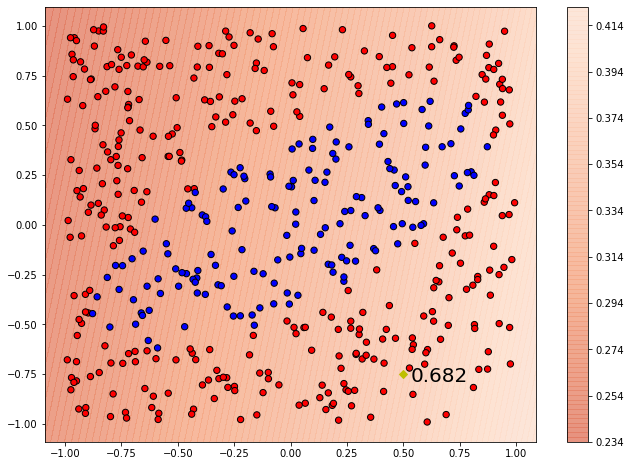

In [10]:
score = model.score(X,y)
plt.figure(figsize=(11,8))
plt.plot(0.5,-0.75, "yD")
plot_boundaries(X,y, score, probability_func=model.predict_proba, mesh_res=500)

In [11]:
print(score)

0.682


#### El accuracy para Gaussians_Distributions es 0.682

# Problema 3:
#### Indicar cuales de las afirmaciones son correctas para el dataset generate_elipse_data()
#### El modelo entrenado detecta todos como rojos
#### El accuracy es igual a la fracción de observaciones rojas
#### Si hubiese una recta que pueda separar al menos una observasión azul, esa sería mejor que la obtenida

Respuesta:
#### Todas estas afirmaciones son correctas

# Problema 3.1 y 3.2:
#### ¿Cual es la probabilidad de que la observación dada por el punto [0.5, -0.75] sea rojo?
#### ¿Cual es la probabilidad de que la observación dada por el punto [0.5, -0.75] sea azul?

In [12]:
obs = np.array([0.5,-0.75])
np.shape(obs)  #> (2,)

# Reshape
new_obs = np.array(obs).reshape(1,2)
np.shape(new_obs)  #>(1, 2)

(1, 2)

In [13]:
new_model=model.predict_proba(new_obs)

In [14]:
new_model.shape

(1, 2)

In [15]:
new_model

array([[0.63053289, 0.36946711]])

#### 0.63 es la probabilidad que dé rojo y 0,369 es la probabilidad que dé azul

# Problema 3.3
#### Analizar y ejecutar el siguiente código en la notebook y responder

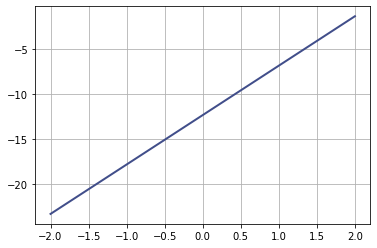

In [16]:
x1 = np.linspace(-2, 2, 100)
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1]
plt.plot(x1, x2, color='#414e8a', linewidth=2)
plt.grid()

## Problema 3.3A
#### ¿Cual es la ordenada al origen de la recta?

In [17]:
x1=0
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1]
print(x2) # ordenada al origen

-12.28977925697606


## Problema 3.3B
#### ¿Cual es la pendiente de la recta?

Caculamos la pendiente que pasa x 2 puntos (-2,+2)

m = (y2-y1)/(x2-x1)

x2=2 , 
x1=-2

y2=-1.309076819250267 , 
y1=-23.27048169470185


In [18]:
x1=-2
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1]
print(x2) # ordenada al origen x2 cuando x1=-2

-23.27048169470185


In [19]:
x1=2
x2 = -(model.coef_[0][0] * x1 + model.intercept_[0]) / model.coef_[0][1]
print(x2) # ordenada al origen x2 cuando x1=+2

-1.309076819250267


In [20]:
m=(-1.309076819250267+23.27048169470185)/(2+2)
print(m)  # pendiente de la recta

5.490351218862895


## Problema 3.3C
#### ¿Cuantos parámetros aprendió el modelo?

In [21]:
model.coef_

array([[ 0.33368331, -0.06077631]])

In [22]:
model.intercept_

array([-0.74692749])

#### Se observa que el modelo aprendió 3 parámetros, 2 de coef_ y 1 de intercept_

# Problema 3.4

#### Importar la función log_loss de sklearn y calcularla

In [23]:
from sklearn.metrics import log_loss

In [24]:
y_predict = model.predict_proba(X)     # y_pred.shape = (n_samples,) o (n_samples, n_classes)

In [25]:
y_true = y  #son los valores de y

In [26]:
print(log_loss(y_true, y_predict))

0.6208125613102843


#### Log_loss = 0.6208125613102843

# Problema 4

#### A_ Completar la función add_columns(X)

#### B_ ¿Cuanto da el accuracy?

# A:

In [27]:
print('La dimensión de las observaciones',X.shape, 'Tiene que quedar en (500, 6)')

La dimensión de las observaciones (500, 2) Tiene que quedar en (500, 6)


In [28]:
# Completar la función 
def add_columns(X):
    # Se agrega primer columna elevada al cuadrada como 3er columna
    X = np.append(X,(X[:,0]**2).reshape(-1,1), axis=1)
    # TODO: Agregar producto de primer columna por segunda columna en la cuarta columna
    X = np.append(X,(X[:,0]*X[:,1]).reshape(-1,1) , axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # TODO: Agregar segunda columna elevada al cuadrada como 5er columna
    X = np.append(X,(X[:,1]**2).reshape(-1,1) , axis=1) # Agregar aca no olvidar el reshape reshape(-1,1)
    # Se agrega la columna de 1s como 6ta columna para despues usar fit_intercept=False. Es necesario para la librería de graficación
    X = np.append(np.ones((len(X), 1)), X, axis=1)
    return X

In [29]:
add_columns(X).shape

(500, 6)

In [30]:
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False)

In [31]:
model_poly.fit(add_columns(X), y)

LogisticRegression(fit_intercept=False)

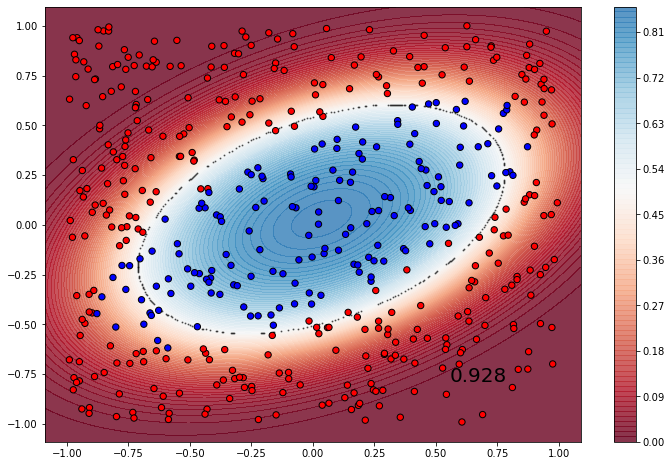

In [32]:
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

In [33]:
print(score)

0.928


# B:
#### el Accuracy para elipse_data es 0.928

# Problema 6

#### Encuentre algún valor de C con el que se obtienen mejores accuracies

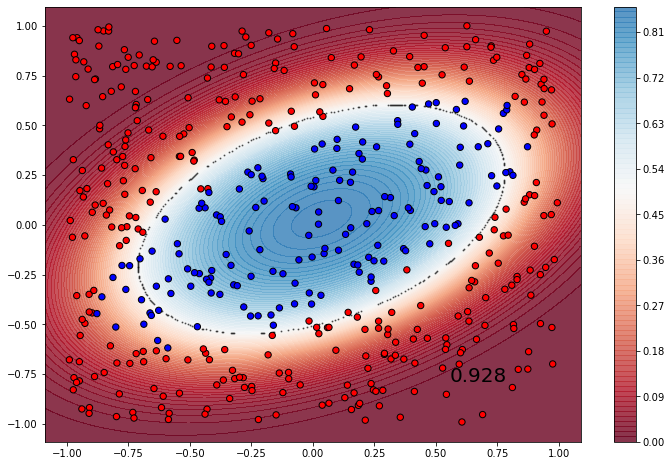

In [34]:
C = 1 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

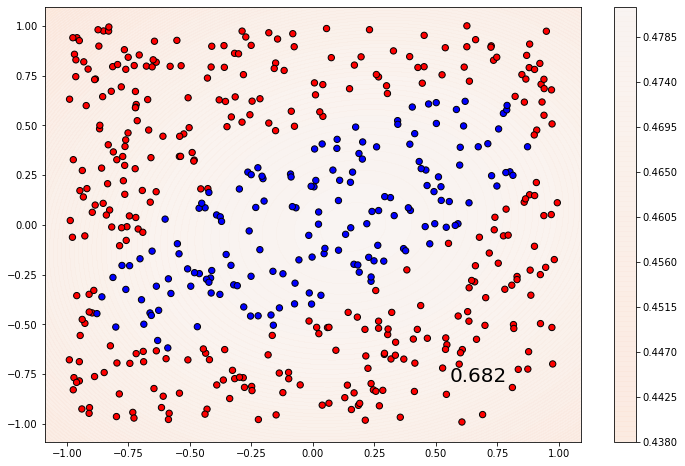

In [35]:
C = 0.001 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

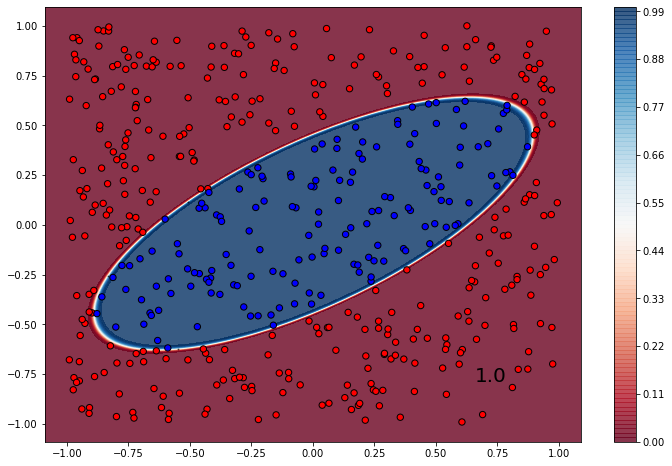

In [36]:
C = 100000 # Modifique el valos de C
model_poly = LogisticRegression(solver='lbfgs', fit_intercept=False, C=C)
model_poly.fit(add_columns(X), y)
plt.figure(figsize=(12,8))
score = model_poly.score(add_columns(X), y)
plot_boundaries(X,y, score, probability_func=model_poly.predict_proba, mesh_res=500, degree=2)

#### Para valores de C mayores a 100000 se logra un accuracy de 1 para ambos datasets